<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# Introduction aux SVM en R

** Objectifs : ** 

- Apprendre à manipuler les SVM pour la classification en R avec la librairie **`kernlab`**
- Observer l'effet du noyau et de la pénalité sur les règles de classification

# SVM linéaires :

## Génération des données

On commence par générer un jeu de données "jouet" : deux échantillons gaussiens en dimension 2 pour la visualisation avce des moyennes de signes différents.

In [1]:
# Generation  des variables explicatives :

n=80
p=2
s=1
m1=0
m2=3

x1=matrix(rnorm(n*p,mean=m1,sd=s),n,p)
x2=matrix(rnorm(n*p,mean=m2,sd=s),n,p)
x=rbind(x1,x2)
dim(x)

[1] 160   2

In [2]:
# Génération des labels
y=matrix(c(rep(-1,n),rep(1,n)))

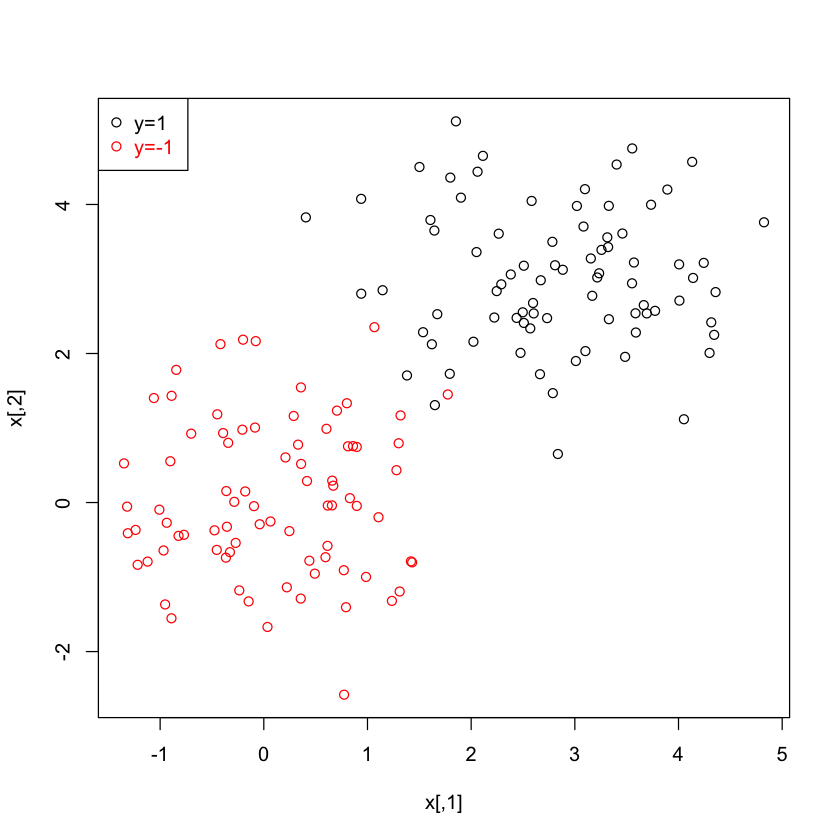

In [3]:
# Visualisation des données
plot(x,col=ifelse(y>0,1,2))
legend("topleft", c('y=1','y=-1'),col=c(1,2),pch=1, text.col=c(1,2))

In [4]:
# Echantillon d'apprentissage et échantillon test
#ntrain=round(1.5*n)
index=sample(2*n,round(1.5*n))
xtrain = x[index,]
xtest= x[-index,]
ytrain=y[index]
ytest=y[-index]


## Apprentissage d'un SVM linéaire

In [6]:
library(kernlab)
help(ksvm)
linsvm=ksvm(xtrain, ytrain,type="C-svc",kernel='vanilladot',C=100)
summary(linsvm)
linsvm

 Setting default kernel parameters  


Length  Class   Mode 
     1   ksvm     S4 

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Linear (vanilla) kernel function. 

Number of Support Vectors : 5 

Objective Function Value : -308.4369 
Training error : 0.008333 

In [7]:
attributes(linsvm)

$param
$param$C
[1] 100


$scaling
$scaling$scaled
[1] TRUE TRUE

$scaling$x.scale
$scaling$x.scale$`scaled:center`
      X1       X2 
1.453668 1.531722 

$scaling$x.scale$`scaled:scale`
      X1       X2 
1.613435 1.847382 


$scaling$y.scale
NULL


$coef
$coef[[1]]
[1]  -68.36683   58.27285 -100.00000  100.00000   10.09398


$alphaindex
$alphaindex[[1]]
[1]  1 61 79 83 91


$b
[1] -0.5835026

$obj
[1] -308.4369

$SVindex
[1]  1 61 79 83 91

$nSV
[1] 5

$prior
$prior[[1]]
$prior[[1]]$prior1
[1] 59

$prior[[1]]$prior0
[1] 61



$prob.model
$prob.model[[1]]
NULL


$alpha
$alpha[[1]]
[1]  68.36683  58.27285 100.00000 100.00000  10.09398


$type
[1] "C-svc"

$kernelf
function (x, y = NULL) 
{
    if (!is(x, "vector")) 
        stop("x must be a vector")
    if (!is(y, "vector") && !is.null(y)) 
        stop("y must be a vector")
    if (is(x, "vector") && is.null(y)) {
        crossprod(x)
    }
    if (is(x, "vector") && is(y, "vector")) {
        if (!length(x) == length(y)) 
          

In [8]:
alphaindex(linsvm)

[[1]]
[1]  1 61 79 83 91

In [9]:
alpha(linsvm)

[[1]]
[1]  68.36683  58.27285 100.00000 100.00000  10.09398

In [10]:
b(linsvm)

[1] -0.5835026

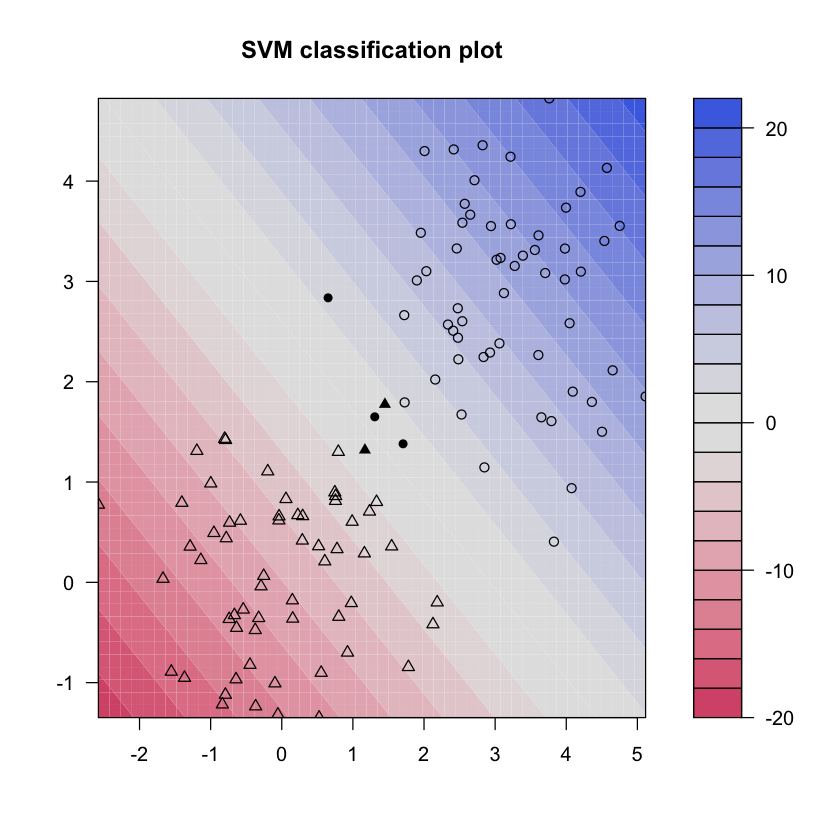

In [11]:
plot(linsvm,data=xtrain)

## Prédiction 

In [12]:
ypred=predict(linsvm,xtest)
ypred
table(ytest,ypred)

[1] -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
[26]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

     ypred
ytest -1  1
   -1 18  1
   1   0 21

In [13]:
# Taux de bonnes prédictions
sum(ypred==ytest)/length(ytest)

[1] 0.975

In [14]:
ypredscore=predict(linsvm,xtest,type="decision")
ypredscore

-12.957826
-9.015787
2.446209
-5.599074
-9.773783
-3.628116
-1.050589
-12.998446
-9.513225
-6.231429
-13.241910


** Tracé des courbes ROC **

In [15]:
library(ROCR)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [16]:
pred=prediction(ypredscore,ytest)

In [17]:
pred

An object of class "prediction"
Slot "predictions":
[[1]]
 [1] -12.957826  -9.015787   2.446209  -5.599074  -9.773783  -3.628116
 [7]  -1.050589 -12.998446  -9.513225  -6.231429 -13.241910  -6.128377
[13]  -6.081387  -8.713415  -8.988675 -11.721997  -5.355768 -11.578897
[19]  -5.060478  10.260338   5.635479  11.764444  12.106085   8.877429
[25]   4.771488   3.038958  12.380582   9.132132   9.630973   3.689418
[31]   8.370012   3.676376   8.612284  12.671973   9.648769   6.699292
[37]   3.383920   8.486248  10.667390   7.376485


Slot "labels":
[[1]]
 [1] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1  1  1  1  1  1 
[26] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
Levels: -1 < 1


Slot "cutoffs":
[[1]]
 [1]        Inf  12.671973  12.380582  12.106085  11.764444  10.667390
 [7]  10.260338   9.648769   9.630973   9.132132   8.877429   8.612284
[13]   8.486248   8.370012   7.376485   6.699292   5.635479   4.771488
[19]   3.689418   3.676376   3.383920   3.038958   2.446209  -

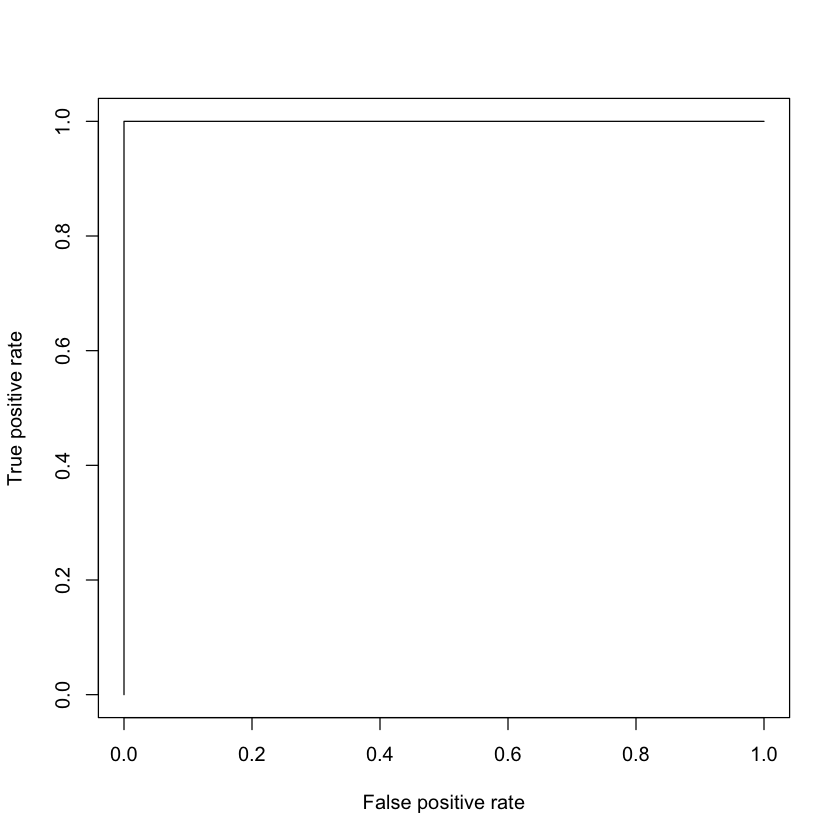

In [18]:
# Courbe ROC :
res1=performance(pred,measure="tpr",x.measure="fpr")
plot(res1)

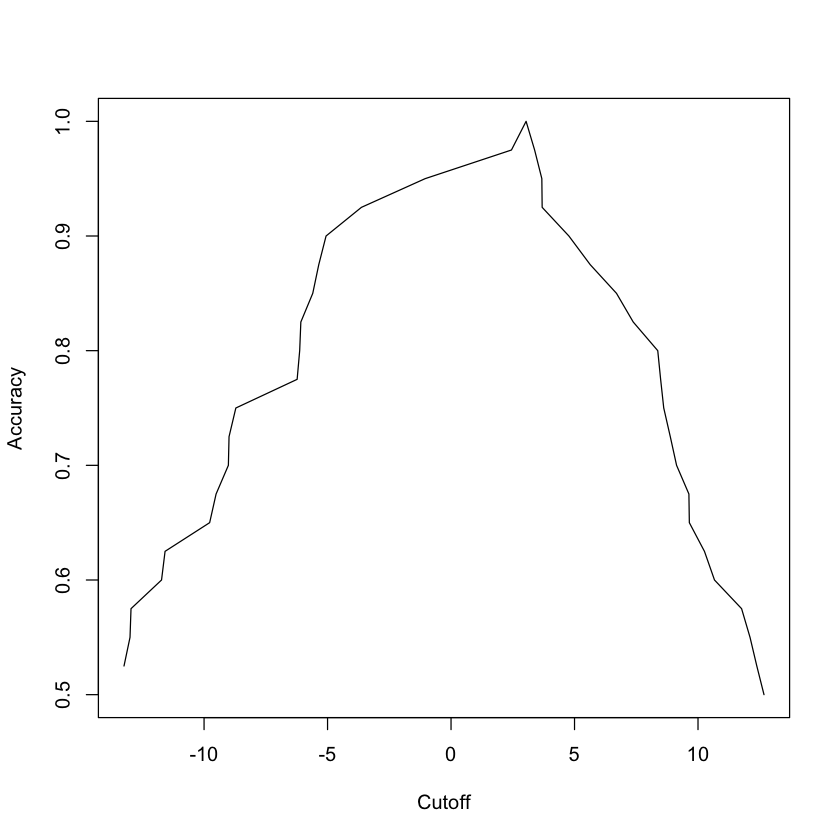

In [19]:
# Performance en fonction du seuil
res3=performance(pred,measure="acc")
plot(res3)


##  Estimation de l'erreur par validation croisée

In [20]:
linsvm=ksvm(x, y,type="C-svc",kernel='vanilladot',C=1,cross=5)
summary(linsvm)
linsvm

 Setting default kernel parameters  


Length  Class   Mode 
     1   ksvm     S4 

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 14 

Objective Function Value : -9.529 
Training error : 0.0125 
Cross validation error : 0.01875 

In [21]:
print(cross(linsvm))

[1] 0.01875


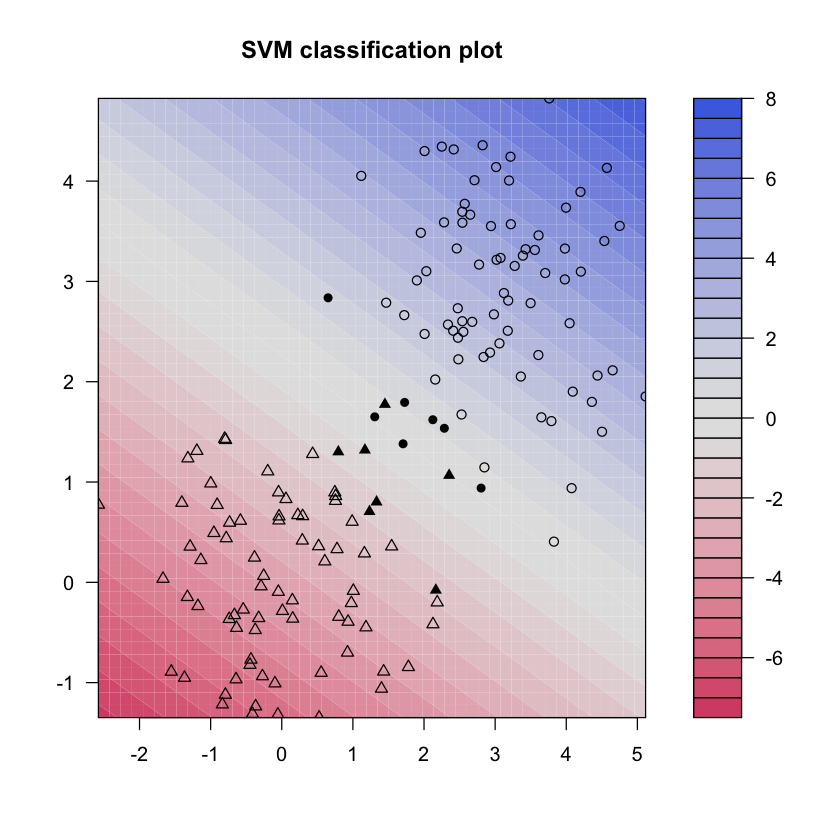

In [22]:
plot(linsvm,data=x)

## Optimisation du paramètre $C$

In [23]:
linsvm=ksvm(x, y,type="C-svc",kernel='vanilladot',C=10,cross=5)
summary(linsvm)
linsvm

 Setting default kernel parameters  


Length  Class   Mode 
     1   ksvm     S4 

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 10 

Linear (vanilla) kernel function. 

Number of Support Vectors : 8 

Objective Function Value : -58.3195 
Training error : 0.0125 
Cross validation error : 0.0125 

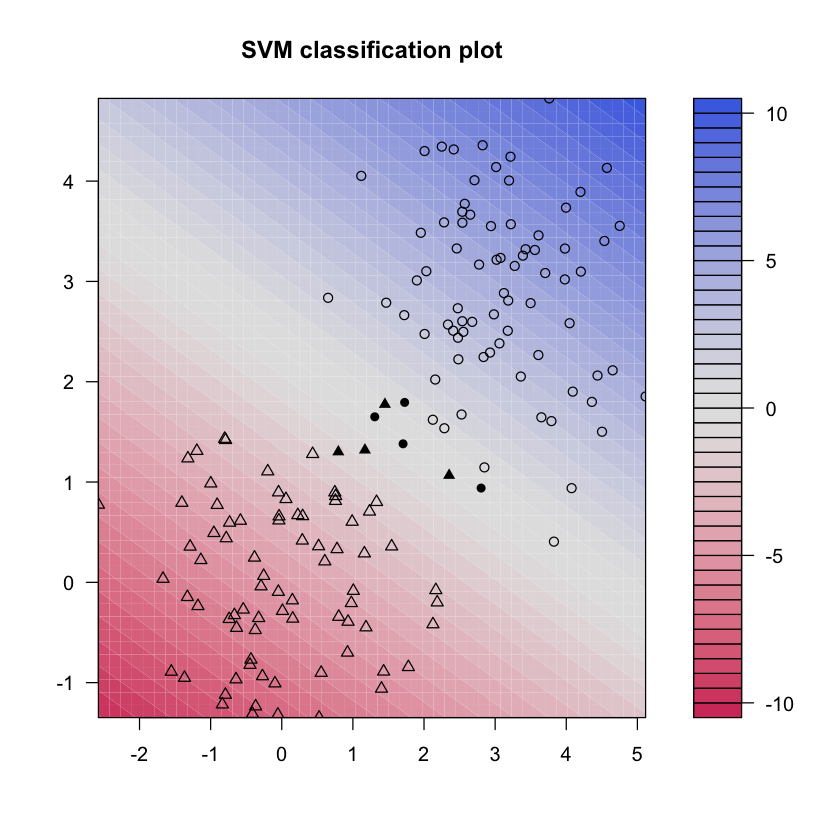

In [24]:
plot(linsvm,data=x)

**Q.** Que constatez-vous sur l'erreur estimée par validation croisée ? Comment expliquez vous ce phénomène ? 

**Q.** Ecrire un programme qui permet de tracer en fonction de $C$ l'erreur estimée par validation croisée. Refaire ce tracé avec des données moins nettement séparées (par exemple en prenant $m1=1$). 

# SVM non linéaires

## Génération des données : 

On génère des données qui ne seront pas linéairement séparables : pour cela, chacun des deux jeux de données est généré selon un mélange gaussien : 

In [25]:
# Generation  des variables explicatives
n=40
p=2
s=1
m1=0
m2=3

x11=matrix(rnorm(n*p,mean=m1,sd=s),n,p)

x12=matrix(c(rnorm(n,mean=m1,sd=s),rnorm(n,mean=m2,sd=s)),n,p)

x21=matrix(c(rnorm(n,mean=m2,sd=s),rnorm(n,mean=m1,sd=s)),n,p)

x22=matrix(rnorm(n*p,mean=m2,sd=s),n,p)

x=rbind(x11,x22,x12,x21)
dim(x)


[1] 160   2

In [26]:
# Génération des labels
y=matrix(c(rep(-1,2*n),rep(1,2*n)))


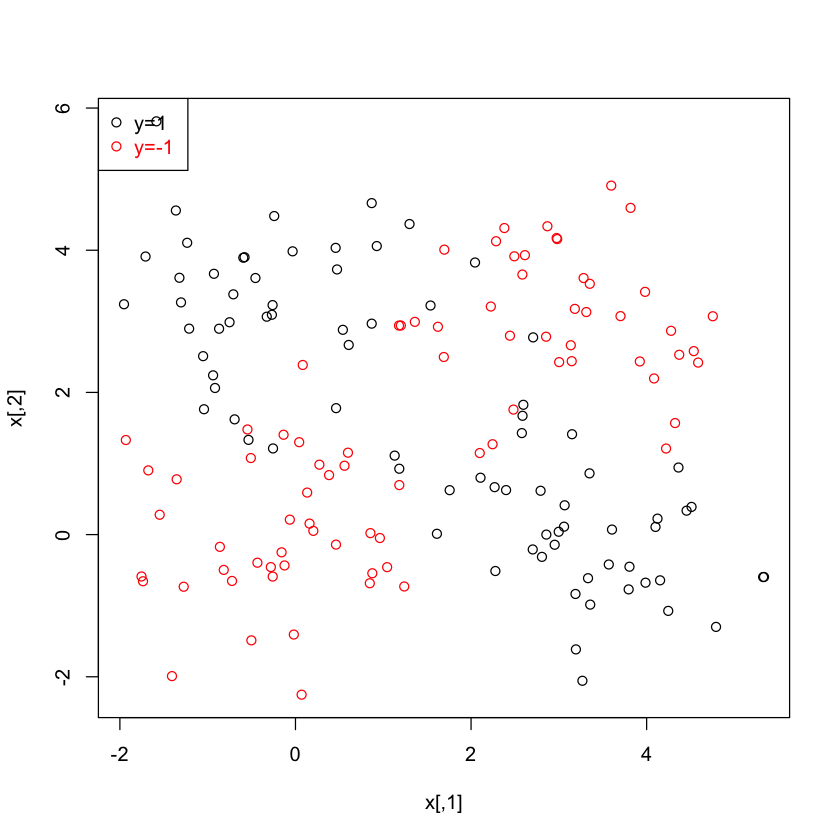

In [27]:
# Visualisation des données
plot(x,col=ifelse(y>0,1,2))
legend("topleft", c('y=1','y=-1'),col=c(1,2),pch=1, text.col=c(1,2))

Au lieu d'utiliser un noyau linéaire, nous allons utiliser un noyau gaussien. 

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1e+10 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  1 

Number of Support Vectors : 29 

Objective Function Value : -802620.9 
Training error : 0 
Cross validation error : 0.15 


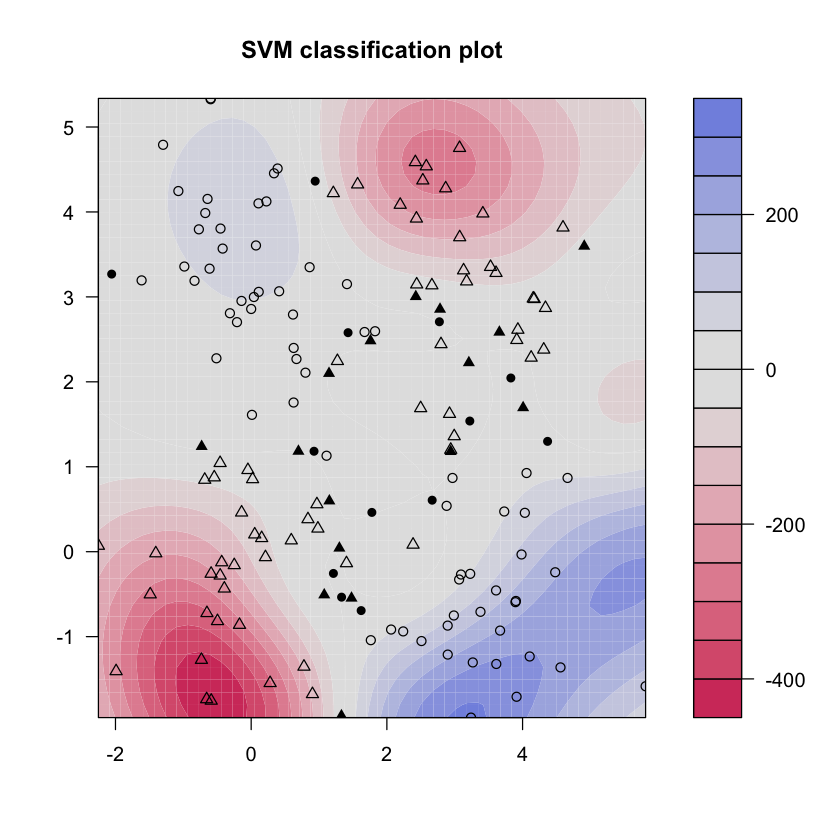

In [28]:
gaussvm=ksvm(x,y,type="C-svc",kernel='rbf',kpar=list(sigma=1),C=10^10,cross=5)
plot(gaussvm, data=x)
print(gaussvm)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  1.64807274806284 

Number of Support Vectors : 67 

Objective Function Value : -45.1487 
Training error : 0.0875 
Cross validation error : 0.13125 


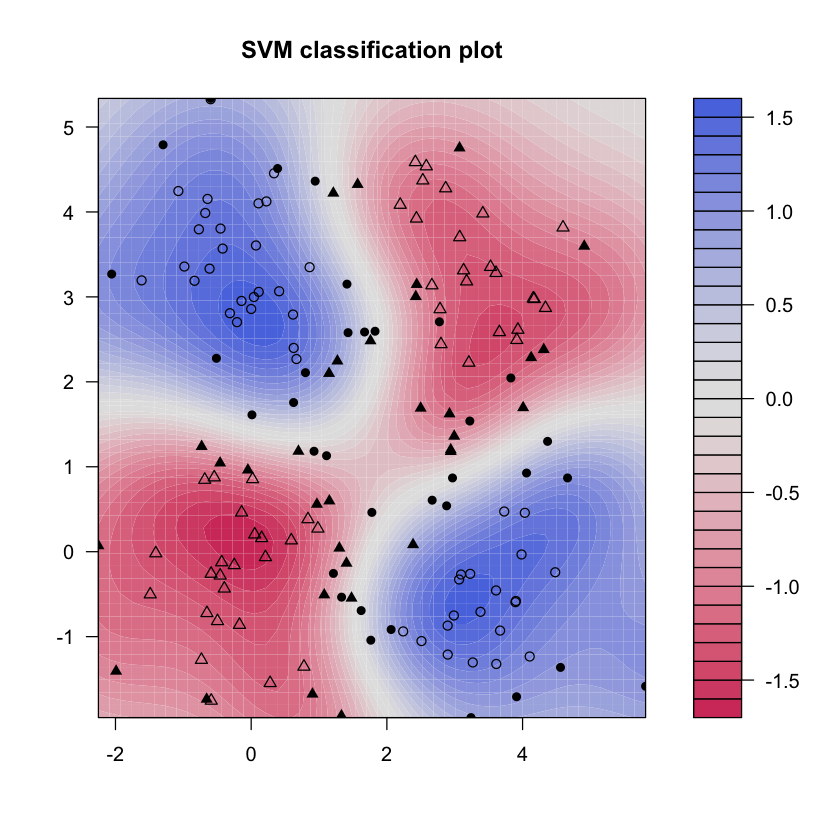

In [29]:
# Selection automatique de sigma
gaussvm=ksvm(x,y,type="C-svc",kernel='rbf',C=1,cross=5)
plot(gaussvm, data=x)
print(gaussvm)

**Q. ** Tracer en fonction de $C$ :
- l'erreur d'apprentissage, l'erreur estimée par validation croisée 
- le nombre de support vectors retenus. 

** Q.** Tester la méthode avec d'autres noyaux et voyez l'importance du choix du noyau ! 


# Application à des données génomiques

A data frame with 106 observations and 58 variables. The first variableClass
is a factor with levels ** + ** for a promoter gene and ** - **
for a non-promoter gene.  The remaining 57 variables V2 to V58 are factors describing the sequence. 
The DNA bases are coded as follows:
- a : adenine
- c : cytosine
- g : guanine
- t: thymine

Réf. : Powell, G., Shavlik, J. and Noordewier, M.
Refinement of Approximate Domain Theories by Knowledge-Based Artificial Neural Networks.
In Proceedings of the Eighth National Conference on Artificial Intelligence (AAAI-90)

In [30]:
data(promotergene)

In [31]:
summary(promotergene)

 Class  V2     V3     V4     V5     V6     V7     V8     V9     V10    V11   
 +:53   a:26   a:34   a:30   a:22   a:36   a:42   a:38   a:34   a:33   a:36  
 -:53   c:27   c:22   c:21   c:30   c:19   c:18   c:21   c:20   c:22   c:22  
        g:15   g:24   g:28   g:28   g:29   g:22   g:17   g:20   g:19   g:20  
        t:38   t:26   t:27   t:26   t:22   t:24   t:30   t:32   t:32   t:28  
 V12    V13    V14    V15    V16    V17    V18    V19    V20    V21    V22   
 a:38   a:21   a:29   a:24   a:23   a:17   a:15   a:40   a:27   a:31   a:28  
 c:22   c:31   c:14   c:38   c:13   c:24   c:14   c:29   c:44   c:24   c:22  
 g:15   g:25   g:29   g:23   g:16   g:11   g:53   g:19   g:12   g:27   g:22  
 t:31   t:29   t:34   t:21   t:54   t:54   t:24   t:18   t:23   t:24   t:34  
 V23    V24    V25    V26    V27    V28    V29    V30    V31    V32    V33   
 a:31   a:22   a:24   a:29   a:28   a:28   a:17   a:18   a:35   a:37   a:31  
 c:20   c:27   c:21   c:21   c:14   c:25   c:30   c:20   c:26   

In [32]:
model=ksvm(Class~.,data=promotergene,kernel="laplacedot", kpar="automatic",C=5,cross=4)
print(model)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Laplace kernel function. 
 Hyperparameter : sigma =  0.0163539738336419 

Number of Support Vectors : 103 

Objective Function Value : -250.2559 
Training error : 0.009434 
Cross validation error : 0.122151 


In [33]:
x=promotergene[,-1]
y=promotergene$Class


In [34]:
Cpred=predict(model,x)

table(Cpred,y)
# Attention, on ne voit ici que l'erreur apparente ! Regarder l'erreur estimée par cross-validation

     y
Cpred  +  -
    + 52  0
    -  1 53

# Classification multi-classes

Pour la classification multiclasses ($k>2$), la fonction **`ksvm`** utilise une approche "one-againts one"", dans laquelle $k(k-1)/2$ classifieurs binaires sont entrainés. La classe est attribuée par un vote majoritaire. 

D'autres algorithmes utilisent une approche "one versus all", où on teste à chaque fois une classe contre toutes les autres. On a alors $k$ classifieurs à construire et on retient généralement la classe qui permet d'avoir la plus grande marge. 

In [35]:
# Generation  des variables explicatives
n=40
p=2
s=1
m1=0
m2=3

x11=matrix(rnorm(n*p,mean=m1,sd=s),n,p)

x12=matrix(c(rnorm(n,mean=m1,sd=s),rnorm(n,mean=m2,sd=s)),n,p)

x21=matrix(c(rnorm(n,mean=m2,sd=s),rnorm(n,mean=m1,sd=s)),n,p)

x22=matrix(rnorm(n*p,mean=m2,sd=s),n,p)

x=rbind(x11,x22,x12,x21)
dim(x)

[1] 160   2

In [36]:
# Génération des labels
n=40
y=matrix(c(rep(1,n),rep(2,n),rep(3,n),rep(4,n)))


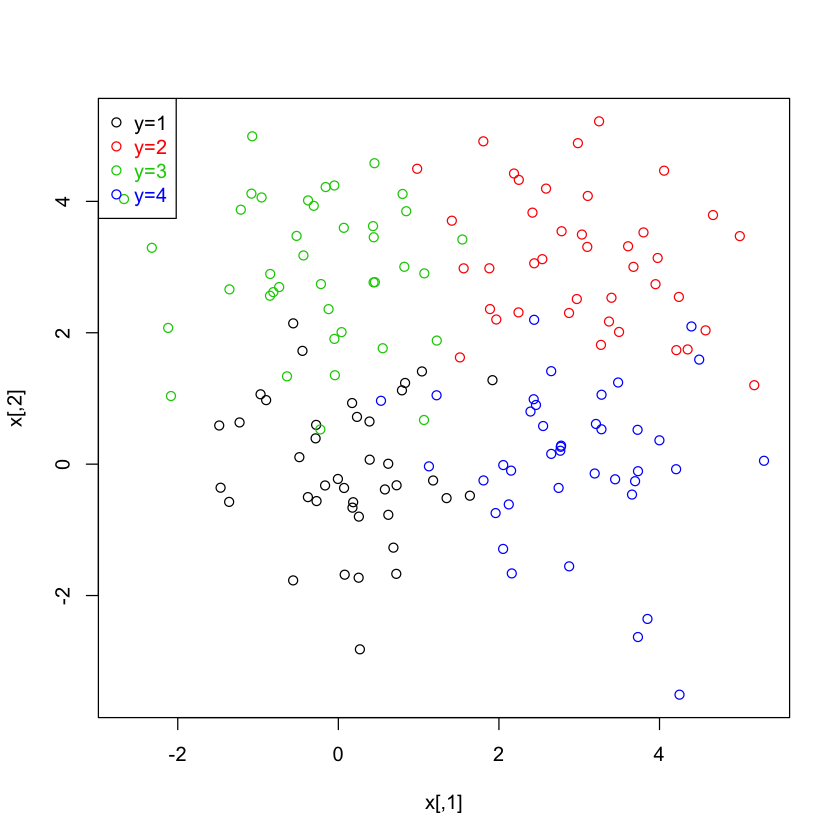

In [37]:
# Visualisation des données
plot(x,col=y)
legend("topleft", c('y=1','y=2',"y=3","y=4"),col=c(1,2,3,4),pch=1, text.col=c(1,2,3,4))

In [38]:

model <- ksvm(x,y,type="C-svc",kernel="rbfdot",C=10,prob.model=TRUE,cross=5)
model
## get fitted values
fitted(model)
## Test on the training set with probabilities as output
#ypred=predict(irismodel, x, type="probabilities")
ypred=predict(model, x)
table(y,ypred)


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 10 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  1.22638617810645 

Number of Support Vectors : 69 

Objective Function Value : -21.2362 -134.2374 -93.9451 -59.1896 -89.82 -42.8796 
Training error : 0.09375 
Cross validation error : 0.14375 
Probability model included. 

[1] 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1
 [38] 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 3 3 3 3 1 3 3 3 3 3 1 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 2 3 3
[112] 3 3 3 3 3 3 3 3 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 2 2
[149] 4 4 1 4 4 4 4 4 4 4 4 2

   ypred
y    1  2  3  4
  1 37  0  2  1
  2  1 39  0  0
  3  4  1 35  0
  4  3  3  0 34

In [39]:

data(iris)
## Create a kernel function using the build in rbfdot function
rbf <- rbfdot(sigma=0.1)
rbf
## train a bound constraint support vector machine
irismodel <- ksvm(Species~.,data=iris,type="C-bsvc",kernel=rbf,C=10,prob.model=TRUE,cross=5)
irismodel
## get fitted values
irispred=fitted(irismodel)

table(irispred,iris$Species)
## Test on the training set with probabilities as output
#predict(irismodel, iris[,-5], type="probabilities")

function (x, y = NULL) 
{
    if (!is(x, "vector")) 
        stop("x must be a vector")
    if (!is(y, "vector") && !is.null(y)) 
        stop("y must a vector")
    if (is(x, "vector") && is.null(y)) {
        return(1)
    }
    if (is(x, "vector") && is(y, "vector")) {
        if (!length(x) == length(y)) 
            stop("number of dimension must be the same on both data points")
        return(exp(sigma * (2 * crossprod(x, y) - crossprod(x) - 
            crossprod(y))))
    }
}
<bytecode: 0x7ff71f4ad710>
<environment: 0x7ff725637c40>
attr(,"kpar")
attr(,"kpar")$sigma
[1] 0.1

attr(,"class")
[1] "rbfkernel"
attr(,"class")attr(,"package")
[1] "kernlab"

Support Vector Machine object of class "ksvm" 

SV type: C-bsvc  (classification) 
 parameter : cost C = 10 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.1 

Number of Support Vectors : 32 

Objective Function Value : -5.8442 -3.0652 -136.9786 
Training error : 0.02 
Cross validation error : 0.053333 
Probability model included. 

            
irispred     setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47         0
  virginica       0          3        50